In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

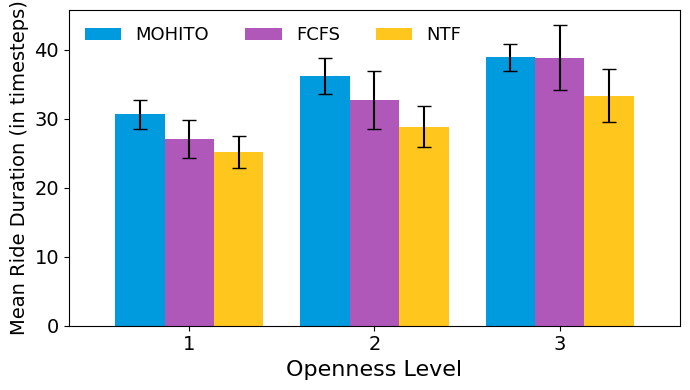

In [ ]:
df=None
df = pd.read_csv('performance_evaluation_mohito-fcfs-ntf.csv')


df['mohito-entry-step'] = df['entry-step'].str.extract(r'tensor\((.*)\)').astype(float)
df = df[df['ride_status'] == 'done']


mohito = df['type'] == 'mohito'
df.loc[mohito, 'entry-step'] = df.loc[mohito, 'mohito-entry-step']
df.drop(columns=['mohito-entry-step'], inplace=True)
df['entry-step'] = df['entry-step'].astype(float)
df['duration'] =  df['step'] - df['entry-step'] 

df = df[df['action-label'] != 'noop']

gp_filt = df[['ol', 'ag', 'type', 'seed', 'duration', 'action-label']].groupby(['ol', 'type', 'ag', 'action-label']).mean().reset_index()



gp_piv = gp_filt.pivot_table(index='ol', columns='type', values='duration', aggfunc='mean').reindex(columns=['mohito', 'FCFS', 'NTF'])
gp_std = gp_filt.pivot_table(index='ol', columns='type', values='duration', aggfunc='std').reindex(columns=['mohito', 'FCFS', 'NTF'])

gp_std = 2.04523 * gp_std / math.sqrt(30)




gp_piv.plot(kind='bar', stacked=False, color=['#009ADE','#AF58BA','#FFC61E','red'], yerr=gp_std, capsize=5, figsize=(7, 4), fontsize=14, width=0.8)
plt.ylabel('Mean Ride Duration (in timesteps)', fontsize=14)
plt.xlabel('Openness Level', fontsize=16,)
plt.legend(title='', fontsize=16, loc='upper left', labels=['MOHITO', 'FCFS', 'NTF'], framealpha=0.0, ncols=3, prop={'size':13})
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('ride_duration.pdf', bbox_inches='tight')